# 深度学习常用名词

## 消融实验

消融实验（ablation study）是一种科学研究方法，用于确定一个条件或参数对结果的影响程度。当研究者提出了一个新的方案或方法时，消融实验通过逐一控制一个条件或参数，来观察结果的变化，以确定哪个条件或参数对结果的影响更大。

举个例子，假设在目标检测系统中，使用了A、B、C三种方法相加取得了不错的效果。但是我们并不知道这个效果是由于A、B还是C起的作用。为了确定哪个方法对结果的影响更大，我们可以保留A、B，移除C进行实验，观察结果的变化。通过这样的消融实验，我们可以最终确定到底是哪个方法对结果的影响更大。

总结来说，消融实验类似于"控制变量法"，通过逐一控制条件或参数来观察结果的变化，以确定它们对结果的影响程度。

消融实验的优点是可以帮助研究人员理解模型的不同组成部分对整体性能的贡献。通过逐步消除模型中的某些组件或功能，研究人员可以评估这些组件或功能对模型性能的影响。这有助于揭示模型的关键组件和关键功能，以及它们在任务中的作用。

消融实验的局限性在于，它可能无法完全反映真实世界的情况。通过消除某些组件或功能，消融实验可能会导致模型在特定任务上的性能下降，但在实际应用中，这些组件或功能可能是必要的。此外，消融实验可能无法考虑到组件之间的相互作用和复杂性，因此结果可能不完全准确。

总的来说，消融实验是一种有用的方法，可以帮助研究人员理解模型的工作原理和性能贡献，但需要谨慎解释和应用其结果。

既然消融实验的目的是展示各个模块/部分对于系统的作用，那么实验的设计者应当对系统的各个模块的构成以及总体的架构有详细的了解。比如说原始的模型M是由一个模块A组成，而新的设计在M的基础上增加了B和C模块，使得现在的模型成为了A+B+C，那么就要分别单独研究模块B与C对于整个系统的影响，此时实验应该按照下面的表格设计，

| |metric 1|	|...|	metric N|
|---|---|---|---|---|
A (baseline)|||||			
A+B|||||			
A+C	|	||||	
A+B+C (final)|	||||		

在上图中，metric 1 - N 表示N个用来评价系统性能的指标，比如图像分类任务中常用的top1 和 top5 error rate。原始模型M（只含有A模块）会被首先测试，得到的结果会成为baseline用来对比。接下来，分别测试模型A+B与A+C来分别测试B模块与C模块的单独作用。最后，就要把所有的模块都放在一起，也就是模型A+B+C，来测试最终模型的性能。

当模块C是基于模块B时，也就是不存在A+C模型的组合方式时，只需要将上表中对应A+C的行删去即可。

## 梯度消失和梯度爆炸

### 问题描述

目前优化神经网络的方法都是基于BP，即根据损失函数计算的误差通过梯度反向传播的方式，指导深度网络权值的更新优化。其中将误差从末层往前传递的过程需要链式法则（Chain Rule）的帮助，因此反向传播算法可以说是梯度下降在链式法则中的应用。

而链式法则是一个连乘的形式，所以当层数越深的时候，梯度将以指数形式传播。梯度消失问题和梯度爆炸问题一般随着网络层数的增加会变得越来越明显。在根据损失函数计算的误差通过梯度反向传播的方式对深度网络权值进行更新时，得到的梯度值接近0或特别大，也就是梯度消失或爆炸。梯度消失或梯度爆炸在本质原理上其实是一样的。

【梯度消失】经常出现，产生的原因有：一是在深层网络中，二是采用了不合适的损失函数，比如sigmoid。当梯度消失发生时，接近于输出层的隐藏层由于其梯度相对正常，所以权值更新时也就相对正常，但是当越靠近输入层时，由于梯度消失现象，会导致靠近输入层的隐藏层权值更新缓慢或者更新停滞。这就导致在训练时，只等价于后面几层的浅层网络的学习。

【梯度爆炸】一般出现在深层网络和权值初始化值太大的情况下。在深层神经网络或循环神经网络中，误差的梯度可在更新中累积相乘。如果网络层之间的梯度值大于 1.0，那么重复相乘会导致梯度呈指数级增长，梯度变的非常大，然后导致网络权重的大幅更新，并因此使网络变得不稳定。

梯度爆炸会伴随一些细微的信号，如：①模型不稳定，导致更新过程中的损失出现显著变化；②训练过程中，在极端情况下，权重的值变得非常大，以至于溢出，导致模型损失变成 NaN等等。

### 解决方法

梯度消失和梯度爆炸问题都是因为网络太深，网络权值更新不稳定造成的，本质上是因为梯度反向传播中的连乘效应。解决梯度消失、爆炸主要有以下几种方法：

（1） pre-training+fine-tunning

此方法来自Hinton在2006年发表的一篇论文，Hinton为了解决梯度的问题，提出采取无监督逐层训练方法，其基本思想是每次训练一层隐节点，训练时将上一层隐节点的输出作为输入，而本层隐节点的输出作为下一层隐节点的输入，此过程就是逐层“预训练”（pre-training）；在预训练完成后，再对整个网络进行“微调”（fine-tunning）。此思想相当于是先寻找局部最优，然后整合起来寻找全局最优，此方法有一定的好处，但是目前应用的不是很多了。

（2） 梯度剪切：对梯度设定阈值

梯度剪切这个方案主要是针对梯度爆炸提出的，其思想是设置一个梯度剪切阈值，然后更新梯度的时候，如果梯度超过这个阈值，那么就将其强制限制在这个范围之内。这可以防止梯度爆炸。

（3） 权重正则化

另外一种解决梯度爆炸的手段是采用权重正则化（weithts regularization），正则化主要是通过对网络权重做正则来限制过拟合。如果发生梯度爆炸，那么权值就会变的非常大，反过来，通过正则化项来限制权重的大小，也可以在一定程度上防止梯度爆炸的发生。比较常见的是 L1 正则和 L2 正则，在各个深度框架中都有相应的API可以使用正则化。

关于 L1 和 L2 正则化的详细内容可以参考我之前的文章——欠拟合、过拟合及如何防止过拟合

（4） 选择relu等梯度大部分落在常数上的激活函数

relu函数的导数在正数部分是恒等于1的，因此在深层网络中使用relu激活函数就不会导致梯度消失和爆炸的问题。


（5） batch normalization

BN就是通过对每一层的输出规范为均值和方差一致的方法，消除了权重参数放大缩小带来的影响，进而解决梯度消失和爆炸的问题，或者可以理解为BN将输出从饱和区拉倒了非饱和区。


（6） 残差网络的捷径（shortcut）

（7） LSTM的“门（gate）”结构

LSTM全称是长短期记忆网络（long-short term memory networks），LSTM的结构设计可以改善RNN中的梯度消失的问题。主要原因在于LSTM内部复杂的“门”(gates)，LSTM 通过它内部的“门”可以在接下来更新的时候“记住”前几次训练的”残留记忆“。

## 梯度裁剪

梯度裁剪（Gradient Clipping）是一种防止梯度爆炸或梯度消失的优化技术，它可以在反向传播过程中对梯度进行缩放或截断，使其保持在一个合理的范围内。梯度裁剪有两种常见的方法：

按照梯度的绝对值进行裁剪，即如果梯度的绝对值超过了一个阈值，就将其设置为该阈值的符号乘以该阈值。
按照梯度的范数进行裁剪，即如果梯度的范数超过了一个阈值，就将其按比例缩小，使其范数等于该阈值。例如，如果阈值为1，那么梯度的范数就是1。
在PyTorch中，可以使用 `torch.nn.utils.clip_grad_value_` 和 `torch.nn.utils.clip_grad_norm_` 这两个函数来实现梯度裁剪，它们都是在梯度计算完成后，更新权重之前调用的。

在PyTorch中，nn.utils.clip_grad_norm_ 函数用于实现梯度裁剪。这个函数会首先计算出梯度的范数，然后将其限制在一个最大值之内。这样可以防止在反向传播过程中梯度过大导致的数值不稳定问题。

这个函数的参数如下：

- parameters：一个基于变量的迭代器，会进行梯度归一化。通常我们会传入模型的参数，如 model.parameters() 。
- max_norm：梯度的最大范数。如果梯度的范数超过这个值，那么就会对梯度进行缩放，使得其范数等于这个值。
- norm_type：规定范数的类型。默认为2，即L2范数。如果设置为1，则使用L1范数；如果设置为0，则使用无穷范数。

代码的工作流程如下：

- optimizer.zero_grad()：清零所有参数的梯度缓存。
- outputs = model(data)：前向传播，计算模型的输出。
- loss = loss_fn(outputs, target)：计算损失函数。
- loss.backward()：反向传播，计算当前梯度。
- nn.utils.clip_grad_norm_(model.parameters(), max_norm=20, norm_type=2)：对梯度进行裁剪，防止梯度爆炸。
- optimizer.step()：更新模型的参数。

**什么情况下需要梯度裁剪**

梯度裁剪主要用于解决神经网络训练中的梯度爆炸问题。以下是一些可能需要使用梯度裁剪的情况：

（1）深度神经网络：深度神经网络，特别是RNN，在训练过程中容易出现梯度爆炸的问题。这是因为在反向传播过程中，梯度会随着层数的增加而指数级增大。

（2）训练不稳定：如果你在训练过程中观察到模型的损失突然变得非常大或者变为NaN，这可能是梯度爆炸导致的。在这种情况下，使用梯度裁剪可以帮助稳定训练。

（3）长序列训练：在处理长序列数据（如机器翻译或语音识别）时，由于序列长度的增加，梯度可能会在反向传播过程中累加并导致爆炸。梯度裁剪可以防止这种情况发生。

需要注意的是，虽然梯度裁剪可以帮助防止梯度爆炸，但它不能解决梯度消失的问题。对于梯度消失问题，可能需要使用其他技术，如门控循环单元（GRU）或长短期记忆（LSTM）网络，或者使用残差连接等方法。

**注意事项**

梯度裁剪虽然是一种有效防止梯度爆炸的技术，但它也有一些潜在的缺点：

（1）选择合适的裁剪阈值：选择一个合适的梯度裁剪阈值可能会比较困难。如果阈值设置的太大，那么梯度裁剪可能就无法防止梯度爆炸；如果阈值设置的太小，那么可能会限制模型的学习能力。通常，这个阈值需要通过实验来确定。

（2）不能解决梯度消失问题：梯度裁剪只能防止梯度爆炸，但不能解决梯度消失问题。在深度神经网络中，梯度消失也是一个常见的问题，它会导致网络的深层部分难以训练。

（3）可能影响优化器的性能：某些优化器，如Adam和RMSProp，已经包含了防止梯度爆炸的机制。在这些优化器中使用梯度裁剪可能会干扰其内部的工作机制，从而影响训练的效果。

（4）可能引入额外的计算开销：计算和应用梯度裁剪需要额外的计算资源，尤其是在参数量非常大的模型中。

## logits

在深度学习的上下文中，logits 就是一个向量，下一步通常被投给 softmax/sigmoid 的向量。
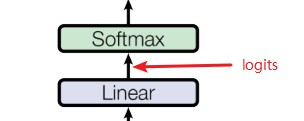

softmax的输出是分类任务的概率，其输入是logits层。 logits层通常产生-infinity到+ infinity的值，而softmax层将其转换为0到1的值。

举个例子:

- 如果一个二分类模型的输出层是一个单节点,没有激活函数,输出值是2.5。则2.5就是这个样本被预测为正类的logits。
- 如果一个多分类模型的输出层是5个节点,没有激活函数,输出值是[1.2, 3.1, -0.5, 4.8, 2.3]。则这个向量表示该样本属于5个类别的logits。

logits可以取任意实数值,正值表示趋向于分类到该类,负值表示趋向于不分类到该类。与之对应,probability经过softmax/sigmoid归一化到0-1之间,表示属于该类的概率。

在深度学习中，Logits（逻辑值）通常是指模型的输出层的原始未经处理的分数或得分，尤其是在分类问题中。Logits并没有经过概率分布的转换，它是神经网络模型在最后一层（全连接层或输出层）的输出结果。

具体来说，Logits是模型对每个类别的线性输出，还未经过 softmax 或 sigmoid 等激活函数的处理。这些原始分数可以被视为模型对每个类别的置信度或概率的度量，但它们并不直接表示概率。

在进行分类任务时，一般会对Logits应用 softmax 函数，将其转化为概率分布，使得每个类别的得分都在0到1之间，且所有类别的概率之和为1。这样处理后的输出可以更直观地解释为每个类别的概率。

总体而言，Logits是神经网络输出的原始值，它们提供了每个类别的分数信息，进而可以用于后续的分类或决策过程。

## Sota

Sota实际上就是State of the arts 的缩写，指的是在某一个领域做的Performance最好的model，一般就是指在一些benchmark的数据集上跑分非常高的那些模型。

SOTA model：并不是特指某个具体的模型，而是指在该项研究任务中，目前最好/最先进的模型。

SOTA result：指的是在该项研究任务中，目前最好的模型的结果/性能/表现。

## 非端到端模型

传统机器学习的流程往往由多个独立的模块组成，比如在一个典型的自然语言处理（Natural Language Processing）问题中，包括分词、词性标注、句法分析、语义分析等多个独立步骤，每个步骤是一个独立的任务，其结果的好坏会影响到下一步骤，从而影响整个训练的结果，这是非端到端的。

## 端到端模型

从输入端到输出端会得到一个预测结果，将预测结果和真实结果进行比较得到误差，将误差反向传播到网络的各个层之中，调整网络的权重和参数直到模型收敛或者达到预期的效果为止，中间所有的操作都包含在神经网络内部，不再分成多个模块处理。由原始数据输入，到结果输出，从输入端到输出端，中间的神经网络自成一体（也可以当做黑盒子看待），这是端到端的。

## Benchmark、Baseline

Benchmark和baseline都是指最基础的比较对象。你论文的motivation（研究目标）来自于想超越现有的baseline/benchmark，你的实验数据都需要以baseline/benckmark为基准来判断是否有提高。唯一的区别就是baseline讲究一套方法，而benchmark更偏向于一个目前最高的指标，比如precision，recall等等可量化的指标。举个例子，NLP任务中BERT是目前的SOTA，你有idea可以超过BERT。那在论文中的实验部分你的方法需要比较的baseline就是BERT，而需要比较的benchmark就是BERT具体的各项指标。

## 泛化（Generalization）

模型的泛化能力通俗易懂的说就是模型在测试集（其中的数据模型以前没有见过）中的表现，也就是模型举一反三的能力，但是这些数据必须满足与iid（独立同分布）并在同一个分布中。
举个例子：一张图片模型之前没有见过，但是这张图片与TrainDataSet在同一分布，并满足iid，模型可以很好的预测这张图，这就是模型的泛化，在测试集中，模型预测新数据的准确率越高，就可以说是模型的泛化能力越好。

## 大模型

一般指1亿以上参数的模型，但是这个标准一直在升级，目前万亿参数以上的模型也有了。大语言模型（Large Language Model，LLM）是针对语言的大模型。

## 指令微调

（Instruction FineTuning），针对已经存在的预训练模型，给出额外的指令或者标注数据集来提升模型的性能，如P-tuning， prompt-tuning，prefix-tuning。

## 增量微调

是指在神经网络中增加额外的层，如lora，adapter。

## 175B、60B、540B

这些一般指参数的个数，B是Billion/十亿的意思，175B是1750亿参数，这是GPT3的参数规模

## GPU和显存

nvidia-smi是Nvidia显卡命令行管理套件，基于NVML库，旨在管理和监控Nvidia GPU设备。
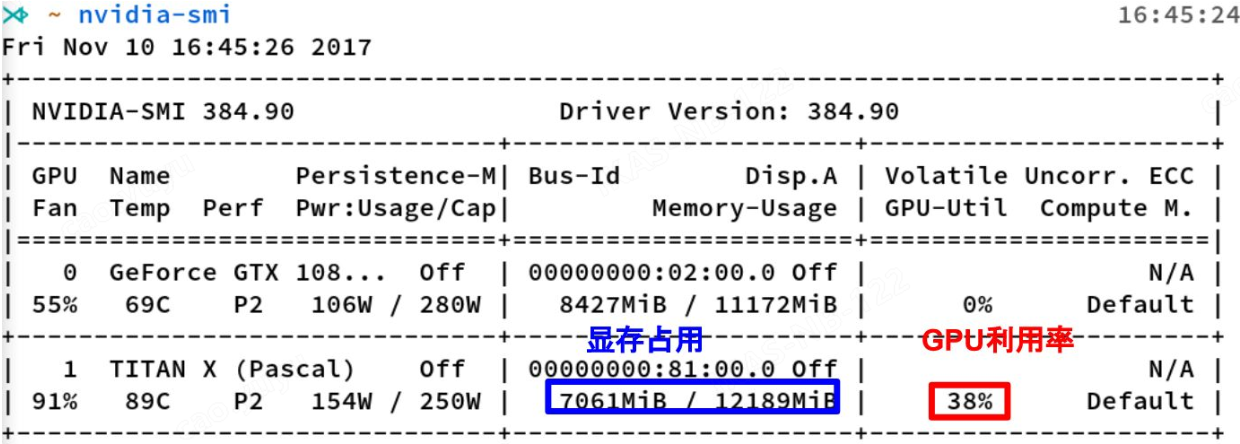
nvidia-smi的输出

这是nvidia-smi命令的输出，其中最重要的两个指标：  
- 显存占用  
- GPU利用率  

显存占用和GPU利用率是两个不一样的东西，显卡是由GPU计算单元和显存等组成的，显存和GPU的关系有点类似于内存和CPU的关系。

显存可以看成是空间，类似于内存。  
- 显存用于存放模型，数据  
- 显存越大，所能运行的网络也就越大  

GPU计算单元类似于CPU中的核，用来进行数值计算。衡量计算量的单位是flop： the number of floating-point multiplication-adds，浮点数先乘后加算一个flop。计算能力越强大，速度越快。衡量计算能力的单位是flops： 每秒能执行的flop数量

在深度学习中会用到各种各样的数值类型，数值类型命名规范一般为TypeNum，比如Int64、Float32、Double64。

Type：有Int，Float，Double等  
Num: 一般是 8，16，32，64，128，表示该类型所占据的比特数目  
常用的数值类型如下图所示(int64 准确的说应该是对应c中的long long类型， long类型在32位机器上等效于int32)：
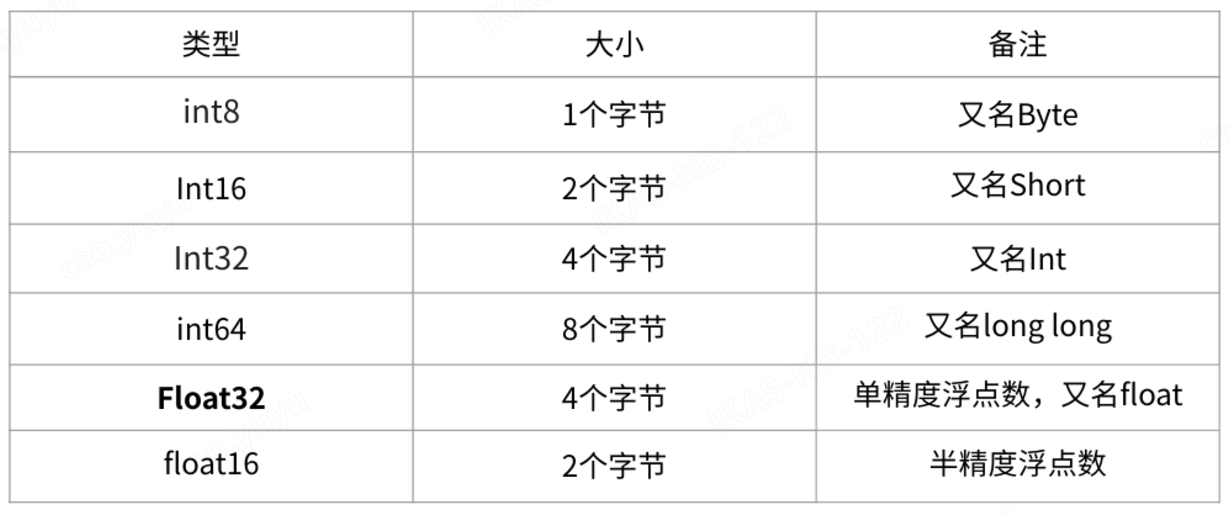
其中Float32 是在深度学习中最常用的数值类型，称为单精度浮点数，每一个单精度浮点数占用4Byte的显存。

举例来说：有一个1000x1000的 矩阵，float32，那么占用的显存差不多就是

1000x1000x4 Byte = 4MB

神经网络模型占用的显存包括：
- 模型自身的参数
- 模型的输出

在深度学习中，一般占用显存最多的是卷积等层的输出，模型参数占用的显存相对较少，而且不太好优化。

节省显存一般有如下方法：

- 降低batch-size
- 下采样(NCHW -> (1/4)\*NCHW)
- 减少全连接层（一般只留最后一层分类用的全连接层）

## 感受野

在卷积神经网络中，感受野(receptive field)不像输出由整个网络输入所决定的全连接网络那样，它是可以存在于网络中任意某层，输出仅由输入部分决定。

输出特征层中一个点映射在原始输入图像中的区域。

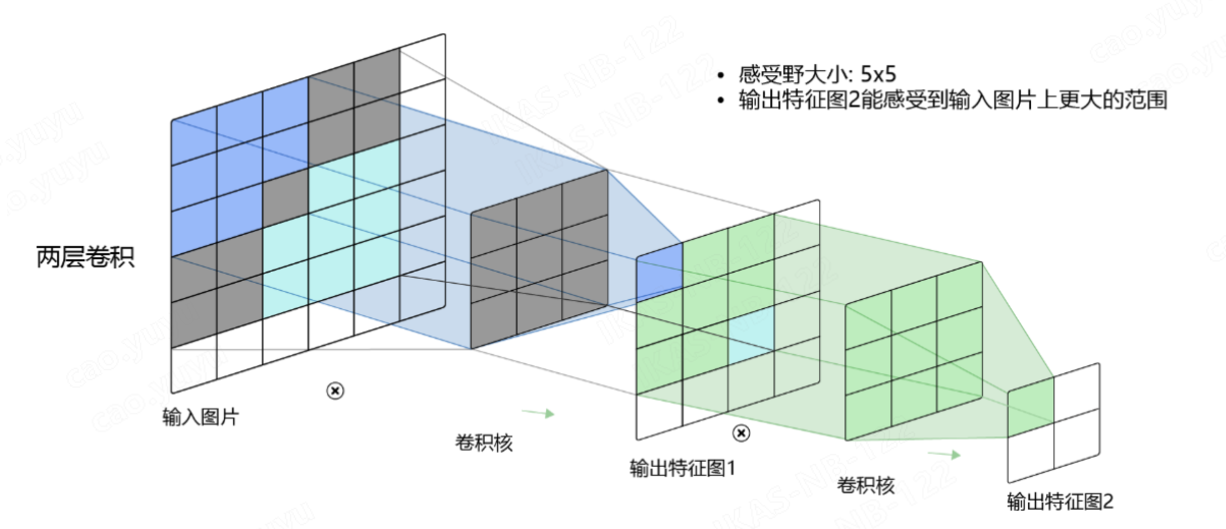

其中，3×3卷积对应的感受野大小就是3×3，而通过两层3×3的卷积之后，感受野的大小将会增加到5×5。

# 深度学习常用参数

## 基本参数

深度学习训练过程中的关键参数和概念对于构建、理解和优化模型至关重要。以下是一些最常见的参数和概念，以及它们的简要解释：

1. 学习率（Learning Rate）
- 学习率是优化算法中最重要的参数之一，它控制着权重调整的幅度。合适的学习率可以使模型快速收敛，而过高或过低的学习率都可能导致模型训练不成功。
2. 批次大小（Batch Size）
- 批次大小指的是在训练过程中一次前向和反向传播中用于更新网络权重的样本数量。它直接影响模型训练的内存消耗、速度和稳定性。
3. 迭代次数（Iterations）
- 迭代次数是指完成一个批次训练的总次数。一个迭代等于使用批次大小数量的样本进行一次前向传播和一次反向传播。
4. 循环次数（Epochs）
- 循环次数是指整个训练数据集被遍历的次数。一个Epoch意味着每个训练样本在训练过程中被使用了一次。
5. 损失函数（Loss Function）
- 损失函数计算模型的预测值和真实值之间的差异。它是训练过程中需要最小化的关键函数，不同的任务选择不同的损失函数。
6. 优化器（Optimizer）
- 优化器决定了模型参数的更新策略。常见的优化器包括SGD、Adam、RMSprop等，它们有助于快速有效地训练模型。
7. 正则化（Regularization）
- 正则化是一种减少模型过拟合的技术，它通过在损失函数中添加一个额外的项（例如L1或L2惩罚项）来限制模型的复杂度。
8. Dropout
- Dropout是一种特殊的正则化技术，它在训练过程中随机“丢弃”一部分神经网络的节点，从而防止模型过于依赖训练数据集中的特定样本。
9. 激活函数（Activation Function）
- 激活函数用于非线性变换输入，使得神经网络可以学习和表示复杂的数据。常见的激活函数包括ReLU、Sigmoid和Tanh等。
10. 学习率调度（Learning Rate Scheduling）
- 学习率调度指的是在训练过程中调整学习率的策略，例如，随着训练的进行逐渐减小学习率，以更细致地调整模型参数。

假设我们有一个数据集，总共包含1200个样本。我们想用这个数据集来训练一个深度学习模型。

样本数量：数据集中的总样本数为1200个。
为了训练模型，我们决定使用小批量梯度下降法，这需要我们设定一个批次大小（Batch Size）。

批次大小（Batch Size）：设定为100，意味着在每次训练（每次迭代）中，我们将使用100个样本。
接下来，我们需要确定循环次数（Epoch），即我们希望模型遍历整个数据集训练多少次。

循环次数（Epoch）：假设我们设置为5，这意味着我们希望模型遍历整个数据集5次来进行训练。
现在，我们来计算完成所有Epoch所需的迭代次数（Iteration）。

迭代次数（Iteration）  
由于每次迭代我们使用100个样本，而整个数据集有1200个样本，所以完成一次Epoch（即遍历一次整个数据集）需要的迭代次数为：

迭代次数（每个Epoch）=样本数量批次大小=1200/100=12迭代次数（每个Epoch）=批次大小样本数量​=1001200​=12
这意味着在每个Epoch中，我们需要12次迭代来遍历整个数据集。

既然我们计划进行5个Epoch的训练，那么总的迭代次数将会是：

总迭代次数 = 迭代次数（每个Epoch） × 循环次数（Epoch） = 12 × 5 = 60
结合起来
所以，在这个例子中：

我们有一个包含1200个样本的数据集。
我们设置批次大小（Batch Size）为100。
我们计划让模型遍历整个数据集5次（即5个Epoch）。
为了完成这5个Epoch的训练，我们将需要进行60次迭代。
这意味着在整个训练过程中，模型的权重将会根据训练数据更新60次，以逐步减少预测误差并提高模型的性能。

## batch_size

batch_size是指在深度学习模型训练过程中，每次迭代（iteration）所使用的样本数量。换句话说，它决定了模型在更新权重时所使用的数据量大小。在随机梯度下降（SGD）及其变种（如Adam、RMSprop等）中，batch_size的大小直接影响了模型的优化过程。

**为什么需要batch_size？**

在深度学习中，我们通常使用大量的数据来训练模型。如果每次迭代都使用整个数据集（即batch_size等于数据集大小），那么这种方法被称为批量梯度下降（Batch Gradient Descent）。然而，批量梯度下降存在以下问题：

计算量大：每次迭代都需要计算整个数据集的梯度，导致计算量非常大。  
收敛速度慢：由于每次迭代都使用整个数据集，模型需要更多的迭代次数才能收敛。

**小批量梯度下降的优点**  
计算量小：每次迭代只计算一个小批量的梯度，降低了计算量。  
收敛速度快：由于每次迭代都使用不同的小批量数据，模型能够更快地收敛到最优解。  
泛化能力强：小批量梯度下降引入了一定的随机性（因为每次迭代使用的小批量数据是随机的），有助于模型在训练过程中学习到更多的数据分布信息，从而提高泛化能力。

**如何选择合适的batch_size？**  

考虑硬件资源：batch_size的大小受到硬件资源的限制。如果GPU或CPU的内存不足，则需要减小batch_size。  
权衡训练速度和精度：较大的batch_size可以加快训练速度，但可能会导致模型精度下降；而较小的batch_size可以提高模型精度，但会减慢训练速度。因此，需要在训练速度和精度之间找到一个平衡点。  
尝试不同的值：在实际应用中，可以尝试不同的batch_size值，并观察模型在验证集上的性能表现。通常，可以使用一些常用的batch_size值（如32、64、128、256等）作为起点。

## 标准化/归一化

Normalization：规范化或标准化，就是把输入数据X，在输送给神经元之前先对其进行平移和伸缩变换，将X的分布规范化成在固定区间范围的标准分布。
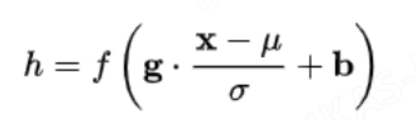
μ：平移参数 ，δ：缩放参数 ，b ：再平移参数， g 再缩放参数，得到的数据符合均值为 b 、方差为g^2 的分布。

### Batch Normalization

Normalization 的作用很明显，把数据拉回标准正态分布，因为神经网络的Block大部分都是矩阵运算，一个向量经过矩阵运算后值会越来越大，为了网络的稳定性，我们需要及时把值拉回正态分布。

Normalization根据标准化操作的维度不同可以分为batch Normalization和Layer Normalization，不管在哪个维度上做noramlization，本质都是为了让数据在这个维度上归一化，因为在训练过程中，上一层传递下去的值千奇百怪，什么样子的分布都有。BatchNorm就是通过对batch size这个维度归一化来让分布稳定下来。LayerNorm则是通过对Hidden size这个维度归一化来让某层的分布稳定。

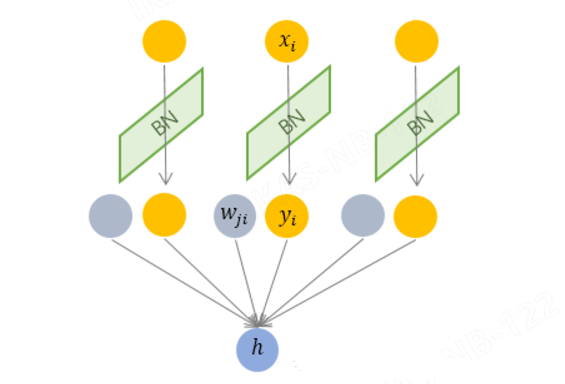
Batch Normalization（纵向规范化）针对单个神经元进行，利用网络训练时一个 mini-batch 的数据来计算该神经元xi的均值和方差,因而称为 Batch Normalization。
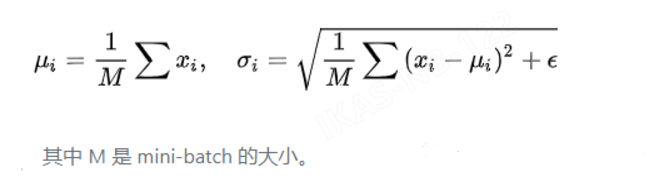

### Layer Normalization

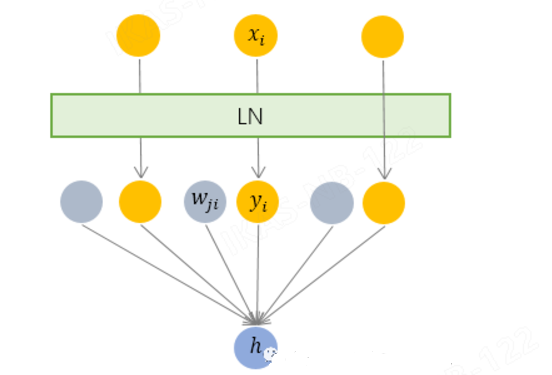
Layer Normalization（横向规范化）综合考虑一层所有维度的输入，计算该层的平均输入值和输入方差，然后用同一个规范化操作来转换各个维度的输入。
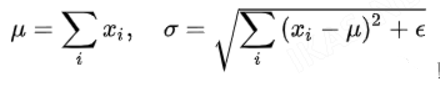
其中 i 枚举了该层所有的输入神经元。对应到标准公式中，四大参数 μ, δ, g, b 均为标量（BN中是向量），所有输入共享一个规范化变换。

### BN vs LN (两者对比)

**BatchNorm是对一个batch-size样本内的每个特征分别做归一化，LayerNorm是分别对每个样本的所有特征做归一化**。BN 的转换是针对单个神经元可训练的：不同神经元的输入经过再平移和再缩放后分布在不同的区间；而 LN 对于一整层的神经元训练得到同一个转换：所有的输入都在同一个区间范围内。如果不同输入特征不属于相似的类别（比如颜色和大小），那么 LN 的处理可能会降低模型的表达能力。

BN抹杀了不同特征之间的大小关系，但是保留了不同样本间的大小关系；LN抹杀了不同样本间的大小关系，但是保留了一个样本内不同特征之间的大小关系。（理解：BN对batch数据的同一特征进行标准化，变换之后，纵向来看，不同样本的同一特征仍然保留了之前的大小关系，但是横向对比样本内部的各个特征之间的大小关系不一定和变换之前一样了，因此抹杀或破坏了不同特征之间的大小关系，保留了不同样本之间的大小关系；LN对单一样本进行标准化，样本内的特征处理后原来数值大的还是相对较大，原来数值小的还是相对较小，不同特征之间的大小关系还是保留了下来，但是不同样本在各自标准化处理之后，两个样本对应位置的特征之间的大小关系将不再确定，可能和处理之前就不一样了，所以破坏了不同样本间的大小关系）。

在BN和LN都能使用的场景中，BN的效果一般优于LN，原因是基于不同数据，同一特征得到的归一化特征更不容易损失信息。但是有些场景是不能使用BN的，例如batch size较小或者序列问题中可以使用LN。这也就解答了RNN 或Transformer为什么用Layer Normalization？

**首先RNN或Transformer解决的是序列问题，一个存在的问题是不同样本的序列长度不一致，而Batch Normalization需要对不同样本的同一位置特征进行标准化处理，所以无法应用；当然，输入的序列都要做padding补齐操作，但是补齐的位置填充的都是0，这些位置都是无意义的，此时的标准化也就没有意义了**。

其次上面说到，BN抹杀了不同特征之间的大小关系；LN是保留了一个样本内不同特征之间的大小关系，这对NLP任务是至关重要的。对于NLP或者序列任务来说，一条样本的不同特征，其实就是时序上的变化，这正是需要学习的东西自然不能做归一化抹杀，所以要用LN。

**LN针对的是单独一个样本，在训练和预测阶段的使用并无差别；BN是针对一个batch进行计算的，训练时自然可以根据batch计算，但是预测时有时要预测的是单个样本，此时要么认为batch size就是1，不进行标准化处理，要么是在训练时记录标准化操作的均值和方差直接应用到预测数据，这两种解决方案都不是很完美，都会存在偏差**。

## 损失函数

### 回归任务常用损失函数

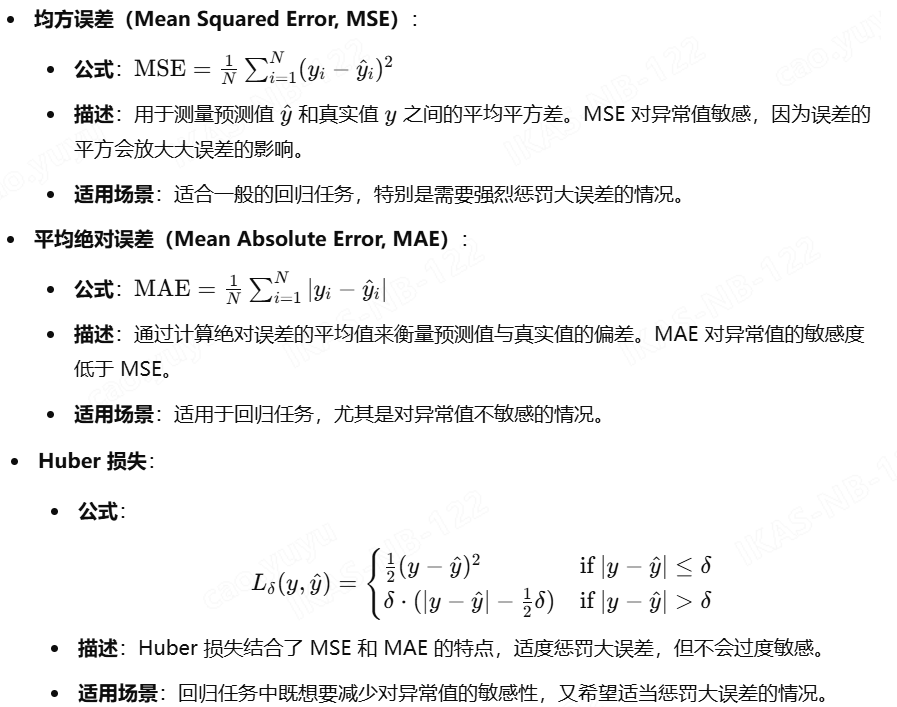

### 分类任务常用损失函数

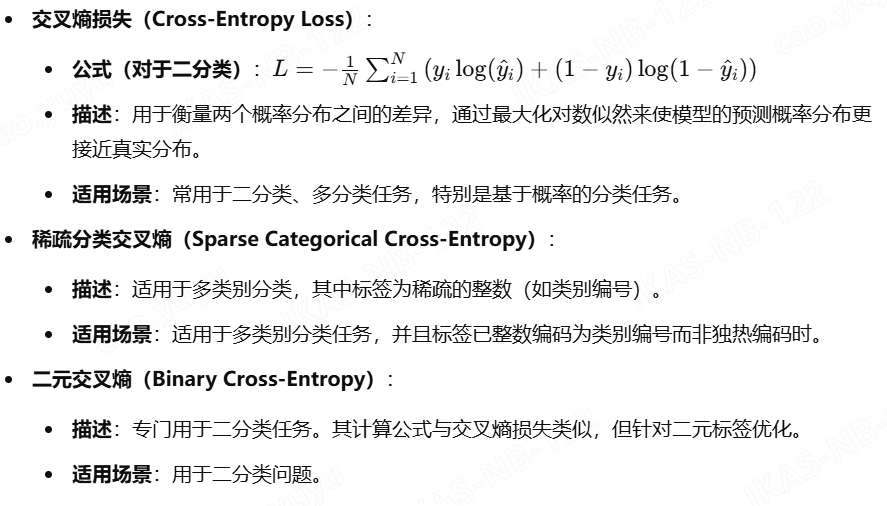

### 生成模型常用损失函数

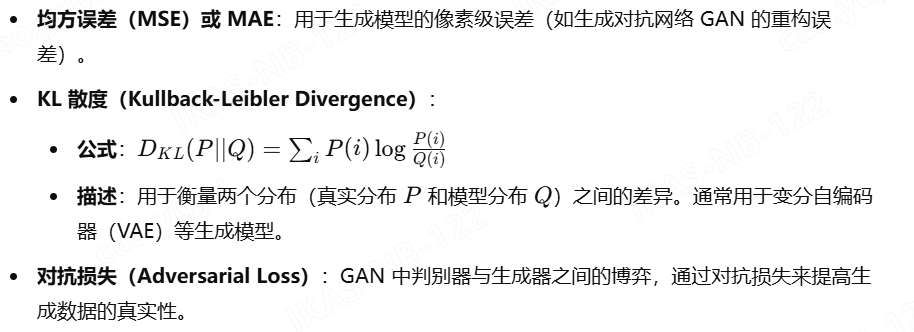

### 自定义损失函数

"SMAPE loss" 是指 Symmetric Mean Absolute Percentage Error，中文意为对称平均绝对百分比误差。这是一种用于衡量预测模型精度的指标，通常用于评估时间序列预测模型的性能。

SMAPE 的计算公式如下：

\$
SMAPE = \frac{100\%}{n} \sum_{t=1}^{n} \frac{|F_t - A_t|}{(|F_t| + |A_t|)/2}
\$

其中：

- \(F_t\) 是模型预测的值；
- \(A_t\) 是实际观测到的值；
- \(n\) 是样本数量。

SMAPE 通常被用作损失函数，用于优化时间序列预测模型。在优化过程中，目标是尽量减小 SMAPE 损失，以提高模型的预测准确性。

In [ ]:
"""
Loss functions for PyTorch.
"""

import torch as t
import torch.nn as nn
import numpy as np
import pdb


def divide_no_nan(a, b):
    """
    a/b where the resulted NaN or Inf are replaced by 0.
    """
    result = a / b
    result[result != result] = .0
    result[result == np.inf] = .0
    return result


class mape_loss(nn.Module):
    def __init__(self):
        super(mape_loss, self).__init__()

    def forward(self, insample: t.Tensor, freq: int,
                forecast: t.Tensor, target: t.Tensor, mask: t.Tensor) -> t.float:
        """
        MAPE loss as defined in: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

        :param forecast: Forecast values. Shape: batch, time
        :param target: Target values. Shape: batch, time
        :param mask: 0/1 mask. Shape: batch, time
        :return: Loss value
        """
        weights = divide_no_nan(mask, target)
        return t.mean(t.abs((forecast - target) * weights))


class smape_loss(nn.Module):
    def __init__(self):
        super(smape_loss, self).__init__()

    def forward(self, insample: t.Tensor, freq: int,
                forecast: t.Tensor, target: t.Tensor, mask: t.Tensor) -> t.float:
        """
        sMAPE loss as defined in https://robjhyndman.com/hyndsight/smape/ (Makridakis 1993)

        :param forecast: Forecast values. Shape: batch, time
        :param target: Target values. Shape: batch, time
        :param mask: 0/1 mask. Shape: batch, time
        :return: Loss value
        """
        return 200 * t.mean(divide_no_nan(t.abs(forecast - target),
                                          t.abs(forecast.data) + t.abs(target.data)) * mask)


class mase_loss(nn.Module):
    def __init__(self):
        super(mase_loss, self).__init__()

    def forward(self, insample: t.Tensor, freq: int,
                forecast: t.Tensor, target: t.Tensor, mask: t.Tensor) -> t.float:
        """
        MASE loss as defined in "Scaled Errors" https://robjhyndman.com/papers/mase.pdf

        :param insample: Insample values. Shape: batch, time_i
        :param freq: Frequency value
        :param forecast: Forecast values. Shape: batch, time_o
        :param target: Target values. Shape: batch, time_o
        :param mask: 0/1 mask. Shape: batch, time_o
        :return: Loss value
        """
        masep = t.mean(t.abs(insample[:, freq:] - insample[:, :-freq]), dim=1)
        masked_masep_inv = divide_no_nan(mask, masep[:, None])
        return t.mean(t.abs(target - forecast) * masked_masep_inv)


## 激活函数

在神经网络中，激活函数（Activation Function）是引入非线性的一种关键操作。激活函数决定了每一层神经元的输出值，进而决定了网络的非线性表达能力，使其可以拟合复杂的函数和高维数据模式。

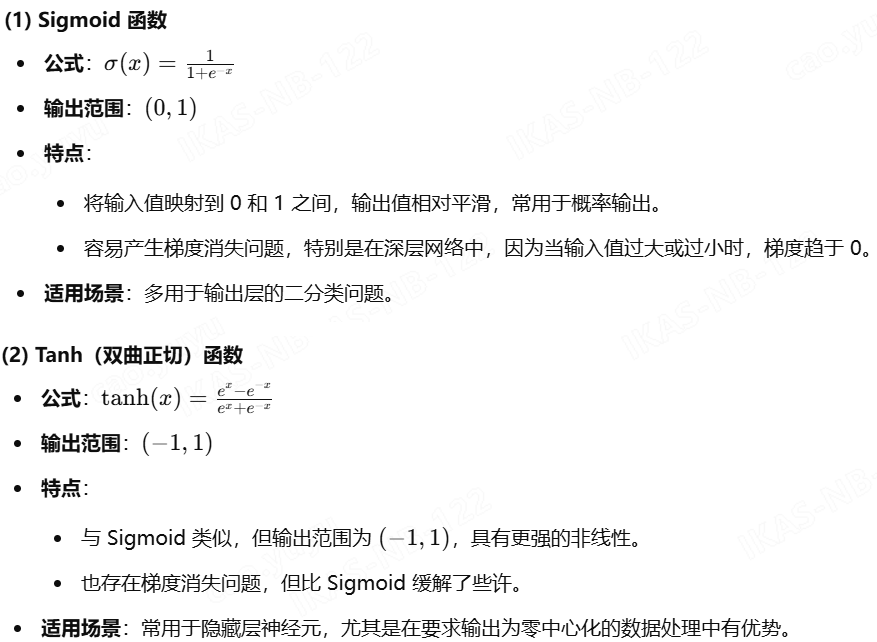
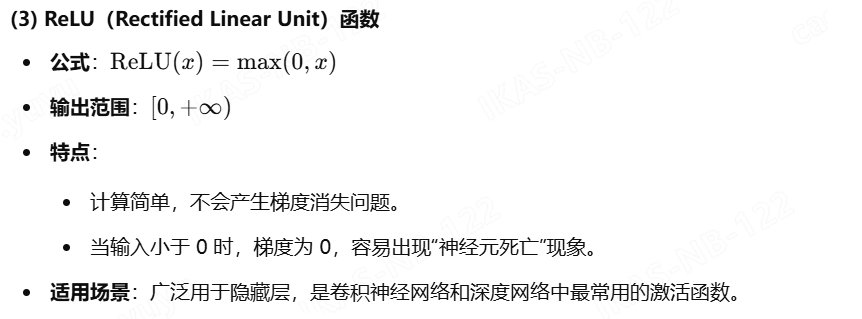
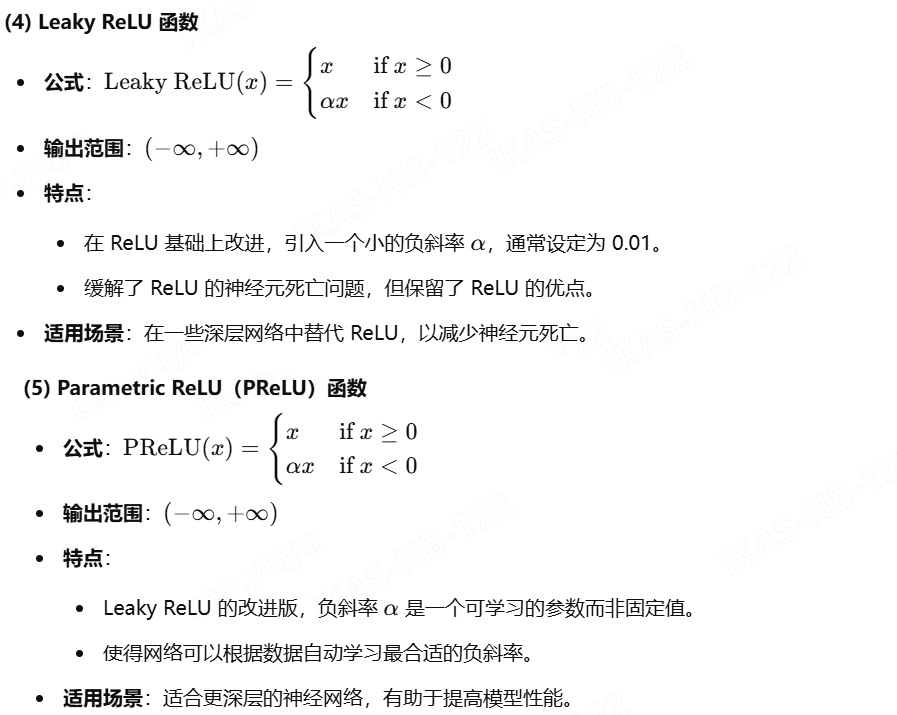
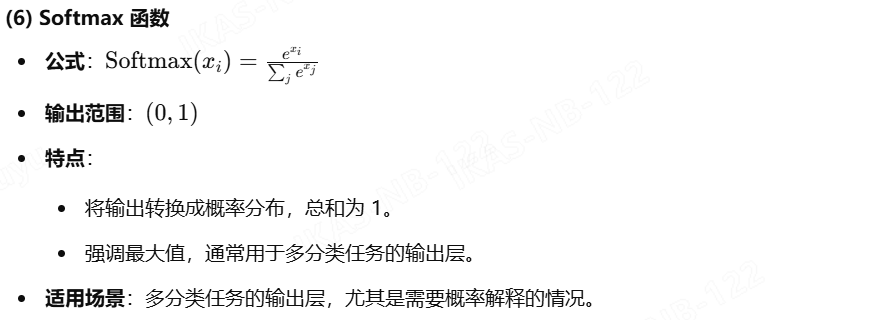
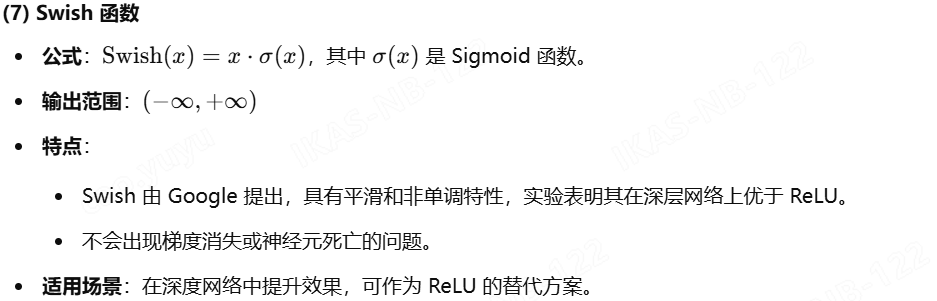

激活函数的选择  
回归任务：输出层通常使用 线性激活，隐藏层可以选择 ReLU、Leaky ReLU。  
二分类任务：输出层一般使用 Sigmoid 激活，隐藏层可以用 ReLU、Leaky ReLU 或 Tanh。  
多分类任务：输出层一般使用 Softmax 激活，隐藏层可以用 ReLU 或 Swish。  
深层网络：隐藏层使用 ReLU、Leaky ReLU、PReLU 或 Swish 函数有助于解决梯度消失和神经元死亡问题。